# CNN Final Phase 1 - Task 2

In [1]:
!ls

drive  sample_data


In [2]:
%cd ./drive/MyDrive/data/split_clash/

/content/drive/MyDrive/data/split_clash


## Create generators

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [4]:
test_gen = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=32, class_mode='categorical')
train_gen = my_generator.flow_from_directory('train', target_size=(150,150), batch_size=32, class_mode='categorical')
validation_gen = my_generator.flow_from_directory('validation', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


### Check image in all generators

#### Train gen check


In [5]:
for batch in train_gen:
    images = batch[0]
    labels = batch[1]
    for i in range(len(labels)):
        print(images[i].shape)
        break
    break

(150, 150, 3)


#### test gen check


In [6]:
for batch in test_gen:
    images = batch[0]
    labels = batch[1]
    for i in range(len(labels)):
        print(images[i].shape)
        break
    break

(150, 150, 3)


#### Validation gen check

In [7]:
for batch in validation_gen:
    images = batch[0]
    labels = batch[1]
    for i in range(len(labels)):
        print(images[i].shape)
        break
    break

(150, 150, 3)


## Imports

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D

## def viz_gen(some_generator):

In [9]:
def viz_gen(some_gen):
    for my_batch in some_gen:
        # my_batch is a tuple with images and labels
        images = my_batch[0]
        labels = my_batch[1]
        for i in range(len(labels)):
            # Gives one image and its corresponding label
            plt.imshow(images[i])
            plt.colorbar()
            plt.show()
            print(images[i].shape)
            print(labels[i])
            break
        break

## Visualize an image

### Visualize train image

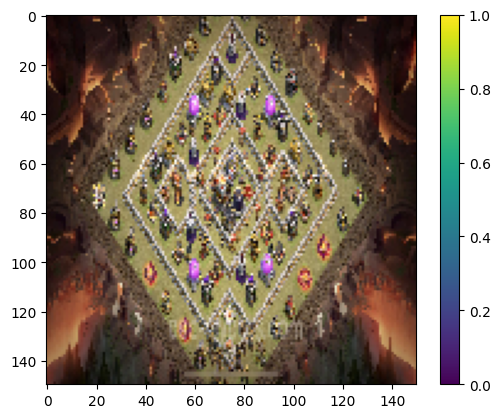

(150, 150, 3)
[0. 1. 0. 0. 0. 0. 0. 0.]


In [10]:
viz_gen(train_gen)

### Visualize test image

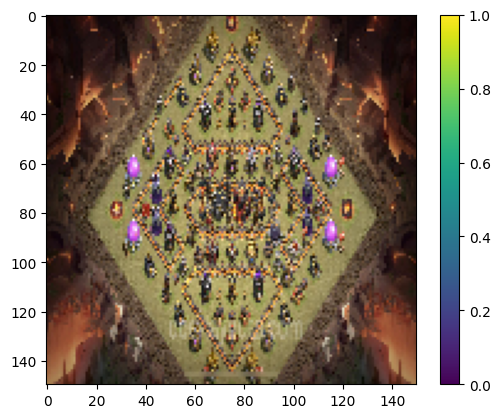

(150, 150, 3)
[1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
viz_gen(test_gen)

### visualize validation image

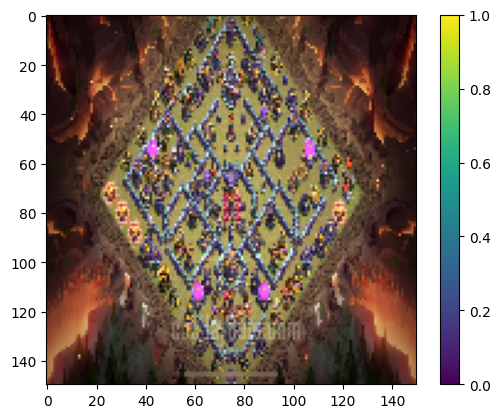

(150, 150, 3)
[0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
viz_gen(validation_gen)

## Initialize dict for keeping track of history

In [13]:
history_dict = {}

## def plot_model_metrics(data, isLoss: boolean, isAccuracy: boolean)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_metrics(data, isLoss, isAccuracy):
    """
    Plot training and validation accuracy/loss for multiple models over epochs.

    Args:
        data (dict): Dictionary containing model data with structure:
                    {model_name: {'history': {'accuracy': [...], 'loss': [...],
                                             'val_accuracy': [...], 'val_loss': [...]},
                                  'epochs': int}}
        isLoss (boolean): should graph loss
        isAccuracy (boolean): should graph accuracy
    """
    # Create figures for accuracy and loss
    fig_acc, ax_acc = plt.subplots(figsize=(10, 6))
    fig_loss, ax_loss = plt.subplots(figsize=(10, 6))

    # Iterate through each model in the data
    for model_name, model_data in data.items():
        history = model_data.get('history', {})
        epochs = model_data.get('epochs', len(history.get('accuracy', [])))

        # Get training and validation metrics
        accuracy = history.get('accuracy', [])
        val_accuracy = history.get('val_accuracy', [])
        loss = history.get('loss', [])
        val_loss = history.get('val_loss', [])

        # Generate epoch numbers (1 to epochs)
        x = np.arange(1, epochs + 1)

        # Plot training accuracy
        if isAccuracy:
            if accuracy:
                ax_acc.plot(x, accuracy, label=f'{model_name}_train', marker='o', linestyle='-')

            # Plot validation accuracy
            if val_accuracy:
                ax_acc.plot(x, val_accuracy, label=f'{model_name}_val', marker='x', linestyle='--')

        # Plot training loss
        if isLoss:
            if loss:
                ax_loss.plot(x, loss, label=f'{model_name}_train', marker='o', linestyle='-')

            # Plot validation loss
            if val_loss:
                ax_loss.plot(x, val_loss, label=f'{model_name}_val', marker='x', linestyle='--')

    # Configure accuracy plot
    ax_acc.set_title('Model Accuracy Over Epochs')
    ax_acc.set_xlabel('Epoch')
    ax_acc.set_ylabel('Accuracy')
    ax_acc.grid(True)
    ax_acc.legend()

    # Configure loss plot
    ax_loss.set_title('Model Loss Over Epochs')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.grid(True)
    ax_loss.legend()

    plt.show()


## 5 CONV - 200 dense

In [15]:
model_1 = Sequential(name="5-conv-200-dense")
input = Input(shape=(150,150,3))

model_1.add(input)

model_1.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2, 2))

model_1.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2,2))

model_1.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_1.add(MaxPooling2D(2,2))

model_1.add(Flatten())
model_1.add(Dense(200, activation = 'relu' ))
model_1.add(Dense(8, activation = 'softmax'))

model_1.summary()

Model: "5-conv-200-dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       409,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,979,984 (7.55 MB)

 Trainable params: 1,979,984 (7.55 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_1.fit(train_gen, epochs=20, batch_size=32, validation_data=validation_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 610s 26s/step - accuracy: 0.1104 - loss: 2.1244 - val_accuracy: 0.2188 - val_loss: 2.0742
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1968 - loss: 2.0147 - val_accuracy: 0.2812 - val_loss: 1.4819
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4131 - loss: 1.3472 - val_accuracy: 0.4812 - val_loss: 1.2070
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6250 - loss: 0.9577 - val_accuracy: 0.5125 - val_loss: 1.0092
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4930 - loss: 1.2222 - val_accuracy: 0.6500 - val_loss: 0.7944
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7363 - loss: 0.7185 - val_accuracy: 0.6938 - val_loss: 0.7363
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7891 - loss: 0.5988 - val_accuracy: 0.7625 - val_loss: 0.4939
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7953 - loss: 0.5114 - val_accuracy: 0.7250 - val_los

### Plots

In [17]:
history.history

{'accuracy': [0.11373092979192734,
  0.24133148789405823,
  0.4993065297603607,
  0.619972288608551,
  0.5353675484657288,
  0.732316255569458,
  0.7850208282470703,
  0.812760055065155,
  0.8391123414039612,
  0.8654646277427673,
  0.8848820924758911,
  0.9098474383354187,
  0.9029126167297363,
  0.9167822599411011,
  0.919556200504303,
  0.9500693678855896,
  0.9015256762504578,
  0.7864077687263489,
  0.930651843547821,
  0.9459084868431091],
 'loss': [2.098513603210449,
  1.8928238153457642,
  1.2150444984436035,
  0.9818405508995056,
  1.1186232566833496,
  0.6882894039154053,
  0.5770695805549622,
  0.49486953020095825,
  0.43470484018325806,
  0.34375888109207153,
  0.28230586647987366,
  0.24613353610038757,
  0.25916436314582825,
  0.21455776691436768,
  0.20514917373657227,
  0.14157238602638245,
  0.37087929248809814,
  0.7718912959098816,
  0.19507360458374023,
  0.1516949087381363],
 'val_accuracy': [0.21875,
  0.28125,
  0.48124998807907104,
  0.512499988079071,
  0.64999

In [18]:
history_dict["5-conv-200-dense"] = {
    "history": history.history,
    "epochs": 20
}

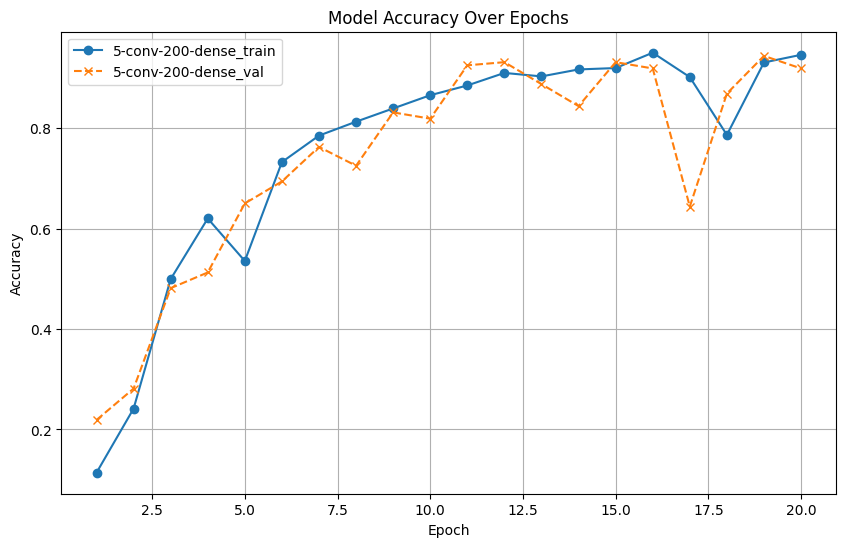

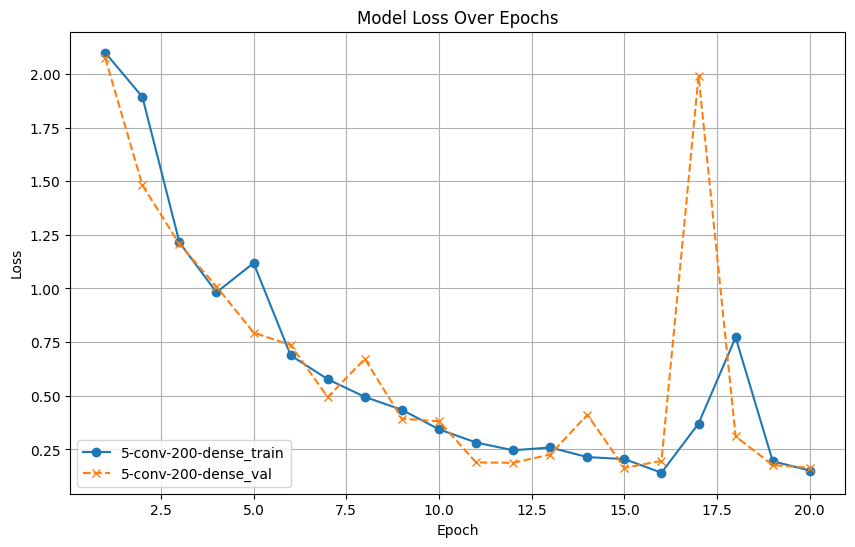

In [20]:
plot_model_metrics(history_dict, True, True)

## 6 CONV - 1000 Dense

In [21]:
model_6 = Sequential(name="6-conv-1000-dense")
input = Input(shape=(150,150,3))

model_6.add(input)
model_6.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_6.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))

model_6.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2, 2))

model_6.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))
model_6.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))

model_6.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_6.add(MaxPooling2D(2,2))
model_6.add(GlobalAveragePooling2D())

model_6.add(Dense(1000, activation = 'relu'))
model_6.add(Dense(8, activation = 'softmax'))

model_6.summary()

Model: "6-conv-1000-dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       513,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         8,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,679,664 (10.22 MB)

 Trainable params: 2,679,664 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_2 = model_6.fit(train_gen, epochs=20, batch_size=32, validation_data=validation_gen)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.1289 - loss: 2.0887 - val_accuracy: 0.3125 - val_loss: 1.9637
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2749 - loss: 1.7661 - val_accuracy: 0.3313 - val_loss: 1.4530
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4157 - loss: 1.3442 - val_accuracy: 0.5500 - val_loss: 0.9922
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5212 - loss: 1.1269 - val_accuracy: 0.5875 - val_loss: 0.9571
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4874 - loss: 1.1151 - val_accuracy: 0.6687 - val_loss: 0.8556
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6009 - loss: 0.9699 - val_accuracy: 0.6687 - val_loss: 0.7097
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6956 - loss: 0.7115 - val_accuracy: 0.7500 - val_loss: 0.6014
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6578 - loss: 0.8468 - val_accuracy: 0.6250 - val_loss:

### Plots

In [23]:
history_2.history

{'accuracy': [0.12482663244009018,
  0.27739250659942627,
  0.4216366112232208,
  0.5353675484657288,
  0.5436893105506897,
  0.6310679316520691,
  0.6837725639343262,
  0.5755894780158997,
  0.662968099117279,
  0.7156726717948914,
  0.783633828163147,
  0.8030512928962708,
  0.7808598875999451,
  0.9001386761665344,
  0.9209431409835815,
  0.7239944338798523,
  0.8862690925598145,
  0.8640776872634888,
  0.930651843547821,
  0.9528432488441467],
 'loss': [2.0708932876586914,
  1.6806979179382324,
  1.2932169437408447,
  1.1230067014694214,
  1.0572843551635742,
  0.8671344518661499,
  0.740244448184967,
  1.0287601947784424,
  0.788529634475708,
  0.6484306454658508,
  0.531907856464386,
  0.5072542428970337,
  0.5217616558074951,
  0.3011561632156372,
  0.22072602808475494,
  0.8793784379959106,
  0.4015285074710846,
  0.3482433557510376,
  0.18832720816135406,
  0.12376751005649567],
 'val_accuracy': [0.3125,
  0.33125001192092896,
  0.550000011920929,
  0.5874999761581421,
  0.668

In [24]:
history_dict["6-conv-1000-dense"] = {
    "history": history_2.history,
    "epochs": 20
}

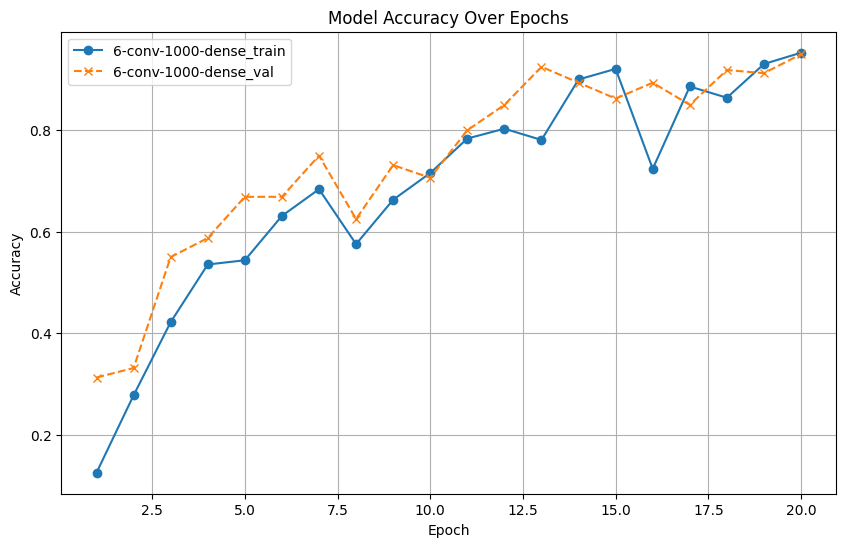

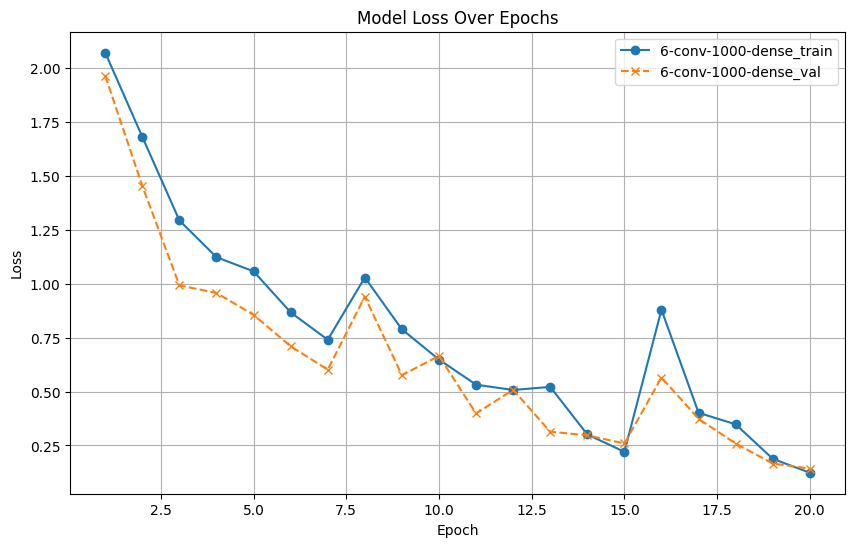

In [26]:
test = { "6-conv-1000-dense": { "history": history_2.history, "epochs": 20 } }
plot_model_metrics(test, True, True)

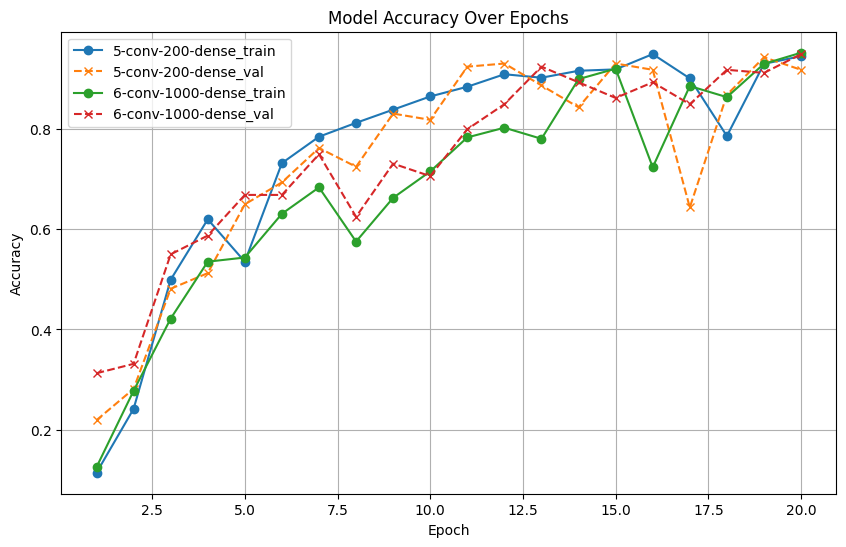

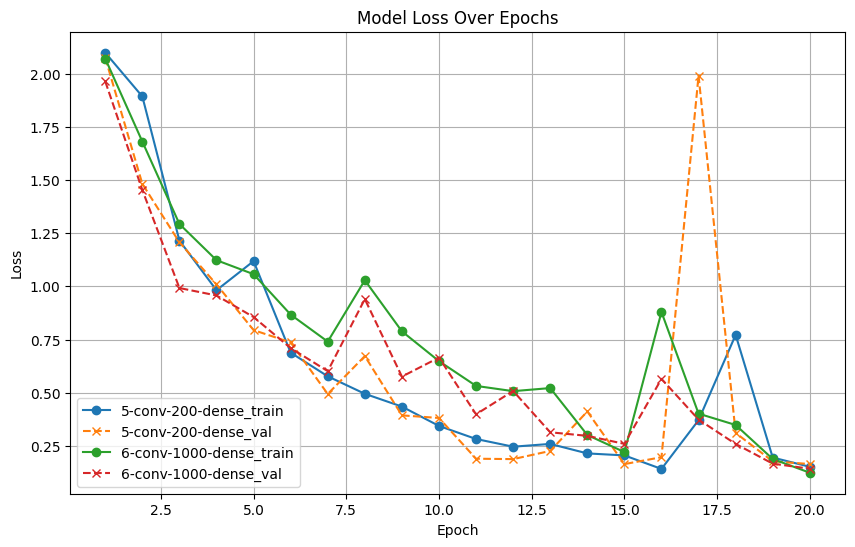

In [27]:
plot_model_metrics(history_dict, True, True)

## 5 CONV - 200 dense - global average pooling instead of flatten before the dense layer

In [28]:
gp_model_1 = Sequential(name="5-conv-200-dense-global-pool")
input = Input(shape=(150,150,3))

gp_model_1.add(input)

gp_model_1.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
gp_model_1.add(MaxPooling2D(2, 2))

gp_model_1.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
gp_model_1.add(MaxPooling2D(2, 2))

gp_model_1.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
gp_model_1.add(MaxPooling2D(2, 2))

gp_model_1.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
gp_model_1.add(MaxPooling2D(2,2))

gp_model_1.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
gp_model_1.add(MaxPooling2D(2,2))

gp_model_1.add(GlobalAveragePooling2D())
gp_model_1.add(Dense(200, activation = 'relu' ))
gp_model_1.add(Dense(8, activation = 'softmax'))

gp_model_1.summary()

Model: "5-conv-200-dense-global-pool"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
gp_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history_gp = gp_model_1.fit(train_gen, epochs=20, batch_size=32, validation_data=validation_gen)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1422 - loss: 2.0849 - val_accuracy: 0.2313 - val_loss: 1.9587
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2644 - loss: 1.8220 - val_accuracy: 0.4625 - val_loss: 1.3263
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3893 - loss: 1.3818 - val_accuracy: 0.5562 - val_loss: 1.1611
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4657 - loss: 1.2855 - val_accuracy: 0.5125 - val_loss: 1.2028
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4600 - loss: 1.2455 - val_accuracy: 0.4812 - val_loss: 1.1854
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6211 - loss: 0.9415 - val_accuracy: 0.7188 - val_loss: 0.7537
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7019 - loss: 0.7612 - val_accuracy: 0.7937 - val_loss: 0.5628
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7699 - loss: 0.6168 - val_accuracy: 0.6750 - val_loss:

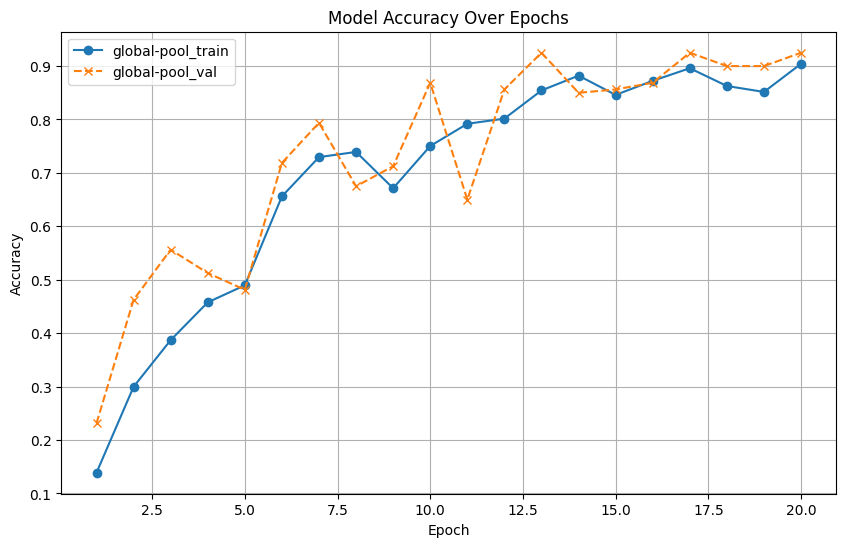

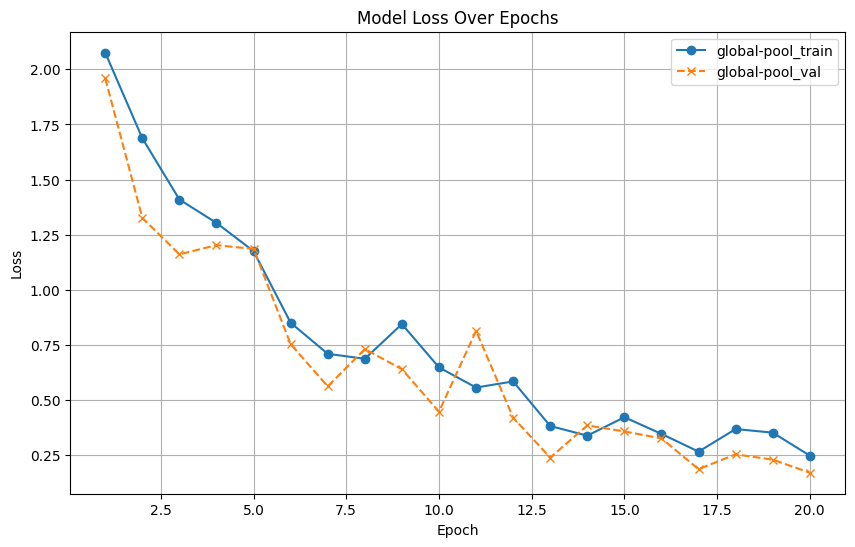

In [30]:
plot_model_metrics({ "global-pool": { "history": history_gp.history, "epochs": 20 }}, True, True)

# Image size - 256 change

In [31]:
# keep these separate so I don't overwrite gens from above
test_gen_256 = my_generator.flow_from_directory('test', target_size=(256,256), batch_size=32, class_mode='categorical')
train_gen_256 = my_generator.flow_from_directory('train', target_size=(256,256), batch_size=32, class_mode='categorical')
validation_gen_256 = my_generator.flow_from_directory('validation', target_size=(256,256), batch_size=32, class_mode='categorical')

Found 161 images belonging to 8 classes.
Found 721 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


## 5 CONV - 200 Dense

In [32]:
large_model_1 = Sequential(name="large-5-conv-200-dense")
large_input = Input(shape=(256,256,3))

large_model_1.add(large_input)

large_model_1.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
large_model_1.add(MaxPooling2D(2, 2))

large_model_1.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
large_model_1.add(MaxPooling2D(2, 2))

large_model_1.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
large_model_1.add(MaxPooling2D(2, 2))

large_model_1.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
large_model_1.add(MaxPooling2D(2,2))

large_model_1.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
large_model_1.add(MaxPooling2D(2,2))

large_model_1.add(GlobalAveragePooling2D())
large_model_1.add(Dense(200, activation = 'relu' ))
large_model_1.add(Dense(8, activation = 'softmax'))

large_model_1.summary()

Model: "large-5-conv-200-dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
large_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
large_history_1 = large_model_1.fit(train_gen_256, epochs=20, batch_size=32, validation_data=validation_gen_256)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.1153 - loss: 2.0884 - val_accuracy: 0.1375 - val_loss: 2.0779
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1758 - loss: 2.0425 - val_accuracy: 0.3875 - val_loss: 1.6677
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3090 - loss: 1.6511 - val_accuracy: 0.5750 - val_loss: 1.0145
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3796 - loss: 1.5380 - val_accuracy: 0.6125 - val_loss: 1.1349
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6522 - loss: 1.0328 - val_accuracy: 0.6438 - val_loss: 0.9057
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6998 - loss: 0.7961 - val_accuracy: 0.6562 - val_loss: 0.8084
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6294 - loss: 0.8847 - val_accuracy: 0.6500 - val_loss: 0.8974
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6387 - loss: 0.9257 - val_accuracy: 0.7937 - val_loss:

### Plots

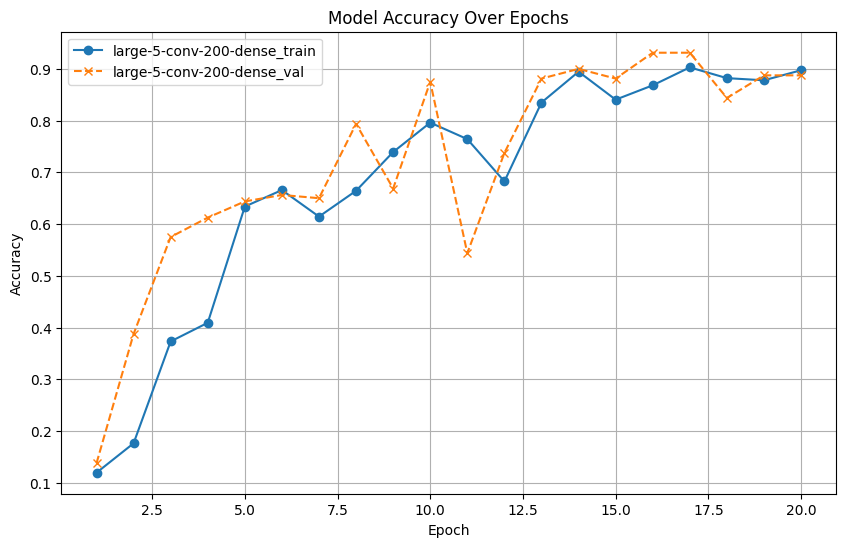

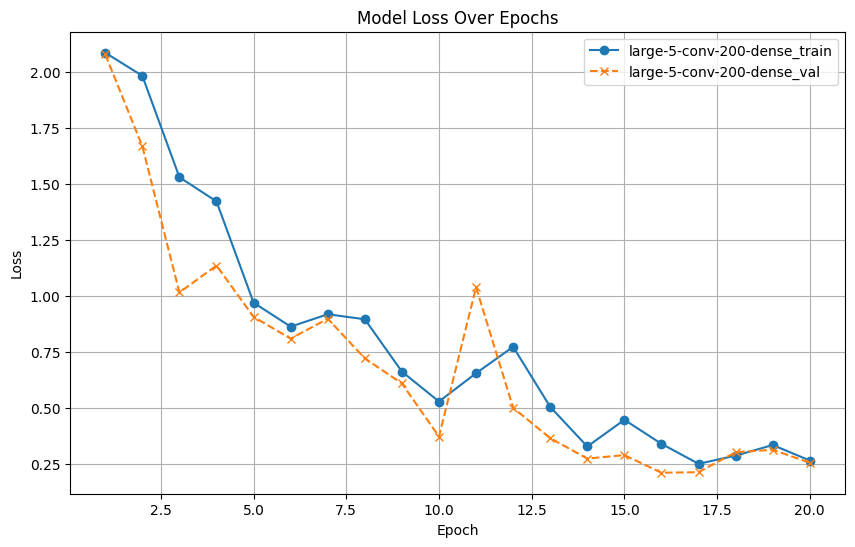

In [34]:
plot_model_metrics({ "large-5-conv-200-dense": { "history": large_history_1.history, "epochs": 20 }}, True, True)

# Model Checkpointing and Early stopping

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Define callbacks

In [41]:
checkpoint = ModelCheckpoint(
        'model_best.keras',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

In [37]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5, # because I have spikes I don't want it to stop at the first epoch of no improvement. I want to monitor the spikes
    restore_best_weights=True, # Keep best weights since its prone to spikes - the final might not be the best
    verbose=1
)

## Checkpoint 500 conv - 200 dense - GlobalAverage

In [42]:
model_checkpoint_1 = Sequential(name="checkpoint-5-conv-200-dense")
input = Input(shape=(150,150,3))

model_checkpoint_1.add(input)

model_checkpoint_1.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_checkpoint_1.add(MaxPooling2D(2, 2))

model_checkpoint_1.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_checkpoint_1.add(MaxPooling2D(2, 2))

model_checkpoint_1.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_checkpoint_1.add(MaxPooling2D(2, 2))

model_checkpoint_1.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_checkpoint_1.add(MaxPooling2D(2,2))

model_checkpoint_1.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_checkpoint_1.add(MaxPooling2D(2,2))

model_checkpoint_1.add(GlobalAveragePooling2D())
model_checkpoint_1.add(Dense(200, activation = 'relu' ))
model_checkpoint_1.add(Dense(8, activation = 'softmax'))

model_checkpoint_1.summary()

Model: "checkpoint-5-conv-200-dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         1,608 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,672,784 (6.38 MB)

 Trainable params: 1,672,784 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_checkpoint_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model_checkpoint_1.fit(train_gen, epochs=30, batch_size=32, validation_data=validation_gen, callbacks=[checkpoint, early_stopping])

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1157 - loss: 2.0901
Epoch 1: val_loss improved from inf to 2.05549, saving model to model_best.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1162 - loss: 2.0898 - val_accuracy: 0.3187 - val_loss: 2.0555
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2260 - loss: 1.9530
Epoch 2: val_loss improved from 2.05549 to 1.61556, saving model to model_best.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2271 - loss: 1.9481 - val_accuracy: 0.2125 - val_loss: 1.6156
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3928 - loss: 1.4852
Epoch 3: val_loss improved from 1.61556 to 1.37498, saving model to model_best.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3942 - loss: 1.4811 - val_accuracy: 0.3625 - val_loss: 1.3750
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5188 - loss: 1.1207
Epoch 4: val_loss improved from 1.37498 to 0.86969, saving model to mode

In [44]:
!ls

model_best.h5  model_best.keras  test  train  validation


### Plots

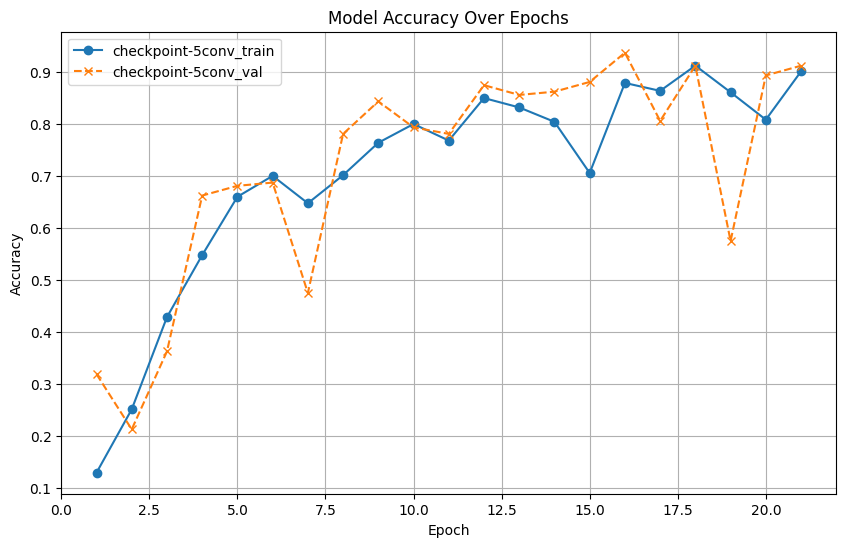

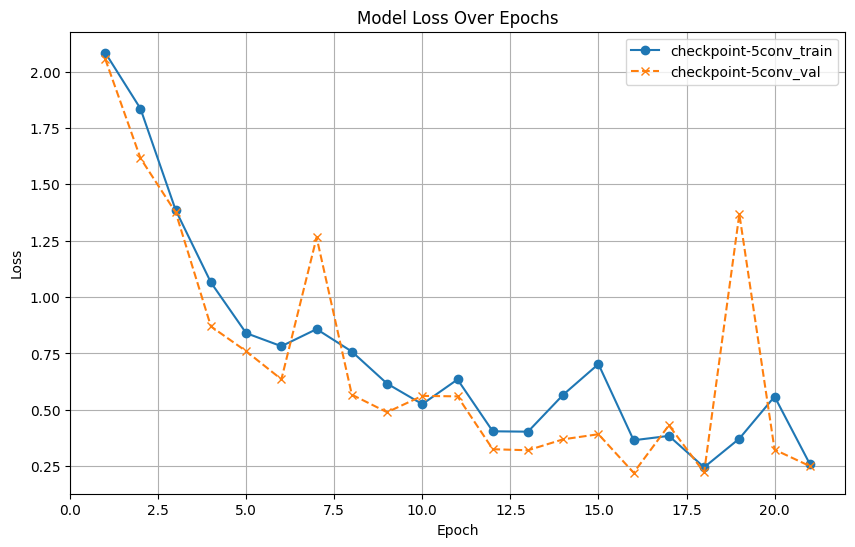

In [45]:
plot_model_metrics({ "checkpoint-5conv": { "history": history.history, "epochs": len(history.history["loss"]) }}, True, True)

## 6 CONV - 1000 Dense

In [48]:
model_checkpoint_2 = Sequential(name="checkpoint-6-conv-1000-dense")
input = Input(shape=(150,150,3))

model_checkpoint_2.add(input)
model_checkpoint_2.add(Conv2D(filters=32, kernel_size=3, activation = 'relu'))
model_checkpoint_2.add(Conv2D(filters=64, kernel_size=3, activation = 'relu'))
model_checkpoint_2.add(MaxPooling2D(2,2))

model_checkpoint_2.add(Conv2D(filters=128, kernel_size=3, activation = 'relu'))
model_checkpoint_2.add(MaxPooling2D(2, 2))

model_checkpoint_2.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_checkpoint_2.add(MaxPooling2D(2,2))
model_checkpoint_2.add(Conv2D(filters=256, kernel_size=3, activation = 'relu'))
model_checkpoint_2.add(MaxPooling2D(2,2))

model_checkpoint_2.add(Conv2D(filters=512, kernel_size=3, activation = 'relu'))
model_checkpoint_2.add(MaxPooling2D(2,2))

model_checkpoint_2.add(GlobalAveragePooling2D())

model_checkpoint_2.add(Dense(1000, activation = 'relu'))
model_checkpoint_2.add(Dense(8, activation = 'softmax'))

model_checkpoint_2.summary()

Model: "checkpoint-6-conv-1000-dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │       513,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │         8,008 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,679,664 (10.22 MB)

 Trainable params: 2,679,664 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model_checkpoint_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
checkpoint_history_2 = model_checkpoint_2.fit(train_gen, epochs=30, batch_size=32, validation_data=validation_gen, callbacks=[checkpoint, early_stopping])

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1179 - loss: 2.0875
Epoch 1: val_loss did not improve from 0.22102
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1180 - loss: 2.0874 - val_accuracy: 0.1375 - val_loss: 2.0787
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1426 - loss: 2.0783
Epoch 2: val_loss did not improve from 0.22102
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1423 - loss: 2.0784 - val_accuracy: 0.1375 - val_loss: 2.0781
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1333 - loss: 2.0798
Epoch 3: val_loss did not improve from 0.22102
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1334 - loss: 2.0798 - val_accuracy: 0.1375 - val_loss: 2.0785
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1253 - loss: 2.0749
Epoch 4: val_loss did not improve from 0.22102
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1260 - loss: 2.0740 - val_accuracy: 0.2375 - val_loss: 1.6662
Epoch 5/30
23/23 ━━━

### Plots

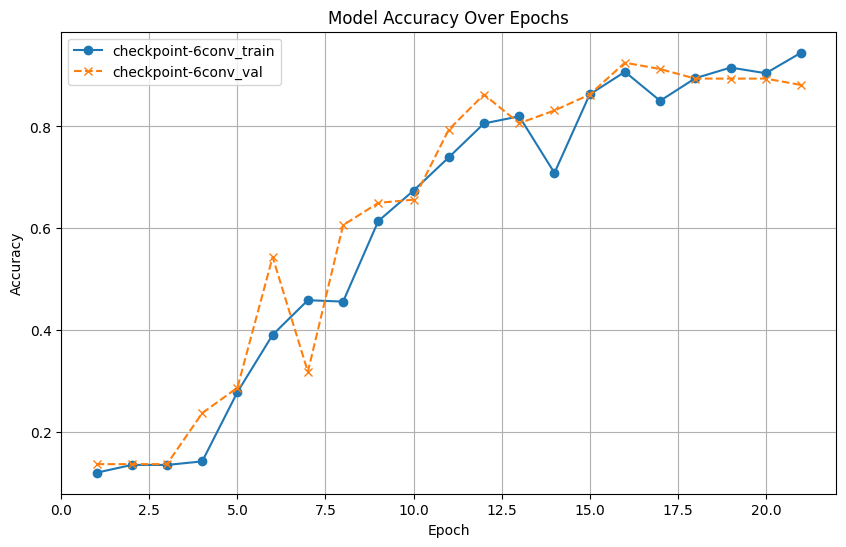

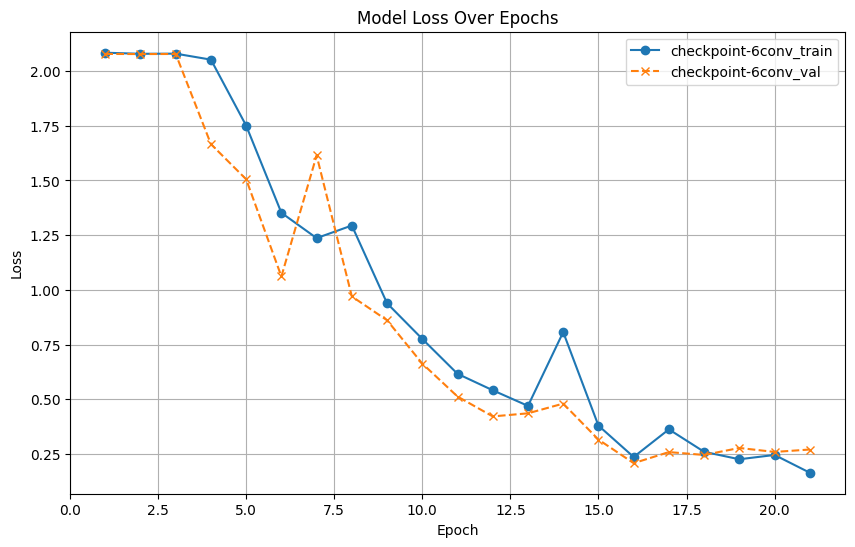

In [68]:

plot_model_metrics({ "checkpoint-6conv": { "history": checkpoint_history_2.history, "epochs": len(checkpoint_history_2.history["loss"]) }}, True, True)

# Load model and test

In [50]:
from tensorflow.keras.models import load_model

In [51]:
!ls

model_best.h5  model_best.keras  test  train  validation


## Use a new test gen that isn't shuffling for consistency on plots and evaluating

In [61]:
test_gen_no_shuffle = my_generator.flow_from_directory('test', target_size=(150,150), batch_size=32, class_mode='categorical', shuffle=False)

Found 161 images belonging to 8 classes.


In [52]:
best_model_weights = load_model('model_best.keras')

In [67]:
best_model_weights.name

'checkpoint-6-conv-1000-dense'

In [62]:
test_loss, test_accuracy = best_model_weights.evaluate(test_gen_no_shuffle, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9605 - loss: 0.1338


In [63]:
print(test_loss, test_accuracy)

0.2024558186531067 0.9254658222198486


## Calculate per-class metrics

In [56]:
from sklearn.metrics import classification_report

In [64]:
test_gen_no_shuffle.reset()
CLASS_NAMES = ['th_10', 'th_11', 'th_12', 'th_13', 'th_14', 'th_15', 'th_16', 'th_17']
y_pred = best_model_weights.predict(test_gen_no_shuffle)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen_no_shuffle.classes[:len(y_pred_classes)]
class_report = classification_report(y_true, y_pred_classes, target_names=CLASS_NAMES, output_dict=True)

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [65]:
class_report # check the dict for visualizing

{'th_10': {'precision': 0.9523809523809523,
  'recall': 1.0,
  'f1-score': 0.975609756097561,
  'support': 20.0},
 'th_11': {'precision': 0.9523809523809523,
  'recall': 1.0,
  'f1-score': 0.975609756097561,
  'support': 20.0},
 'th_12': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0},
 'th_13': {'precision': 0.9523809523809523,
  'recall': 1.0,
  'f1-score': 0.975609756097561,
  'support': 20.0},
 'th_14': {'precision': 1.0,
  'recall': 0.85,
  'f1-score': 0.918918918918919,
  'support': 20.0},
 'th_15': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0},
 'th_16': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 18.0},
 'th_17': {'precision': 0.7,
  'recall': 1.0,
  'f1-score': 0.8235294117647058,
  'support': 21.0},
 'accuracy': 0.9254658385093167,
 'macro avg': {'precision': 0.9446428571428571,
  'recall': 0.91875,
  'f1-score': 0.9169930332053717,
  'support': 161.0},
 'weighted avg': {'precision': 0.9431233362

## Graph per-class metrics

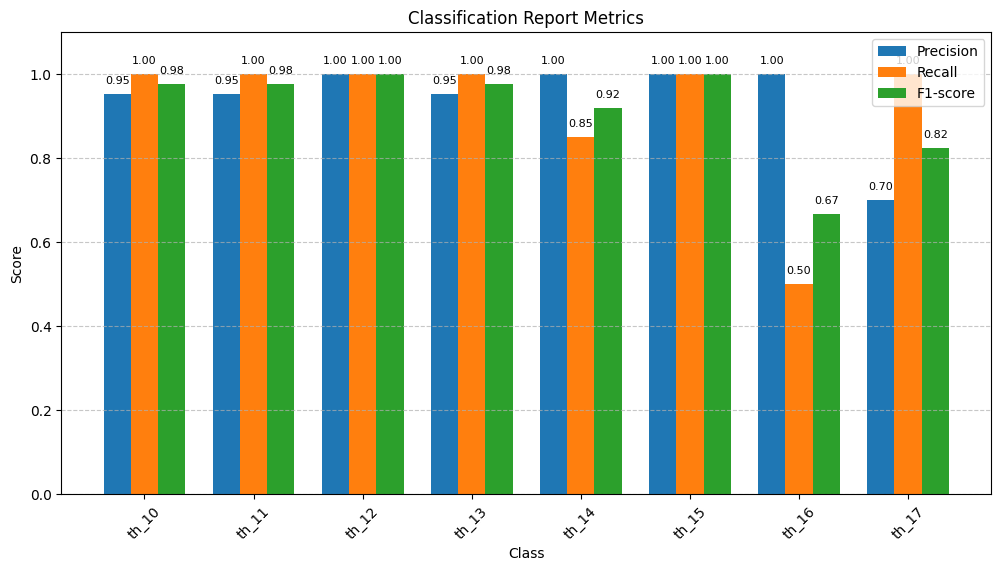

In [66]:
import pandas as pd

 # Extract class names and metrics (exclude 'accuracy', 'macro avg', 'weighted avg')
class_names = [key for key in class_report.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

# Create DataFrame for plotting
data = {
    'Class': [],
    'Metric': [],
    'Value': []
}
for cls in class_names:
    for metric in metrics:
        data['Class'].append(cls)
        data['Metric'].append(metric)
        data['Value'].append(class_report[cls][metric])

df = pd.DataFrame(data)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
bar_width = 0.25
x = range(len(class_names))

# Plot precision, recall, f1-score
for i, metric in enumerate(metrics):
    metric_values = df[df['Metric'] == metric]['Value']
    ax.bar([pos + i * bar_width for pos in x], metric_values,
            width=bar_width, label=metric.capitalize(),
            color=['#1f77b4', '#ff7f0e', '#2ca02c'][i])

# Customize plot
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title(f'Classification Report Metrics')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(class_names, rotation=45)
ax.set_ylim(0, 1.1)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Add value labels on top of bars
for i, metric in enumerate(metrics):
    metric_values = df[df['Metric'] == metric]['Value']
    for j, value in enumerate(metric_values):
        ax.text(j + i * bar_width, value + 0.02, f'{value:.2f}',
                ha='center', va='bottom', fontsize=8)